In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Python Project Data/SampleSuperstore.csv')

In [5]:
#Top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Finding Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Observation:** There are no Null values in data


In [7]:
#Adding a new column 'Profit Margin %'
df['Profit Margin %'] = (df['Profit']/df['Sales'])*100

## **Correlation Heatmap**

<ipython-input-8-71702fb34e23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = 0.05)


<Axes: >

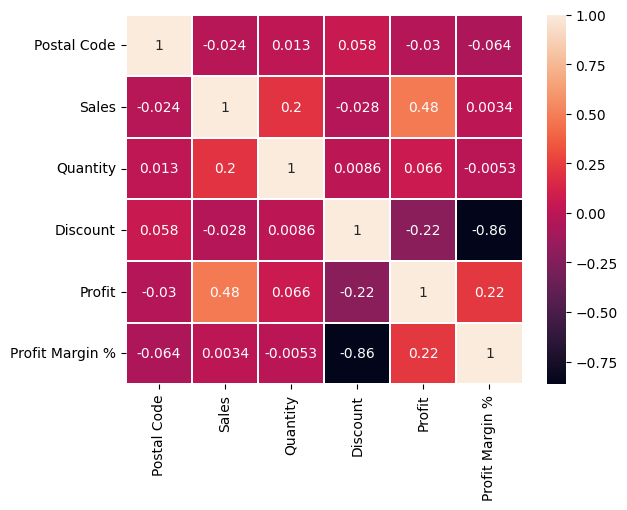

In [8]:
sns.heatmap(df.corr(), annot = True, linewidths = 0.05)

**Observations: **

*   Profit Margin % and Discount have very high negative Correlation -
    means Profit Margin % is inversly related to Discount
*   Profit Margin % is not closely related to any of Profit, Sales and
    Quantity




## **Exploratory Data Analysis**

**1] Category wise Analysis**

In [9]:
#Creating a new Dataframe for Category
category_df = pd.DataFrame(df.groupby(['Category'])[['Quantity', 'Sales', 'Profit']].sum())
category_df

,Quantity,Sales,Profit
Category,,,
Furniture,8028,741999.7953,18451.2728
Office Supplies,22906,719047.0320,122490.8008
Technology,6939,836154.0330,145454.9481


In [10]:
#Adding a new column "Profit Margin %" to Category Dataframe
category_df['Profit Margin %'] = (category_df['Profit']/category_df['Sales'])*100

In [11]:
category_df

,Quantity,Sales,Profit,Profit Margin %
Category,,,,
Furniture,8028,741999.7953,18451.2728,2.486695
Office Supplies,22906,719047.0320,122490.8008,17.035158
Technology,6939,836154.0330,145454.9481,17.395712


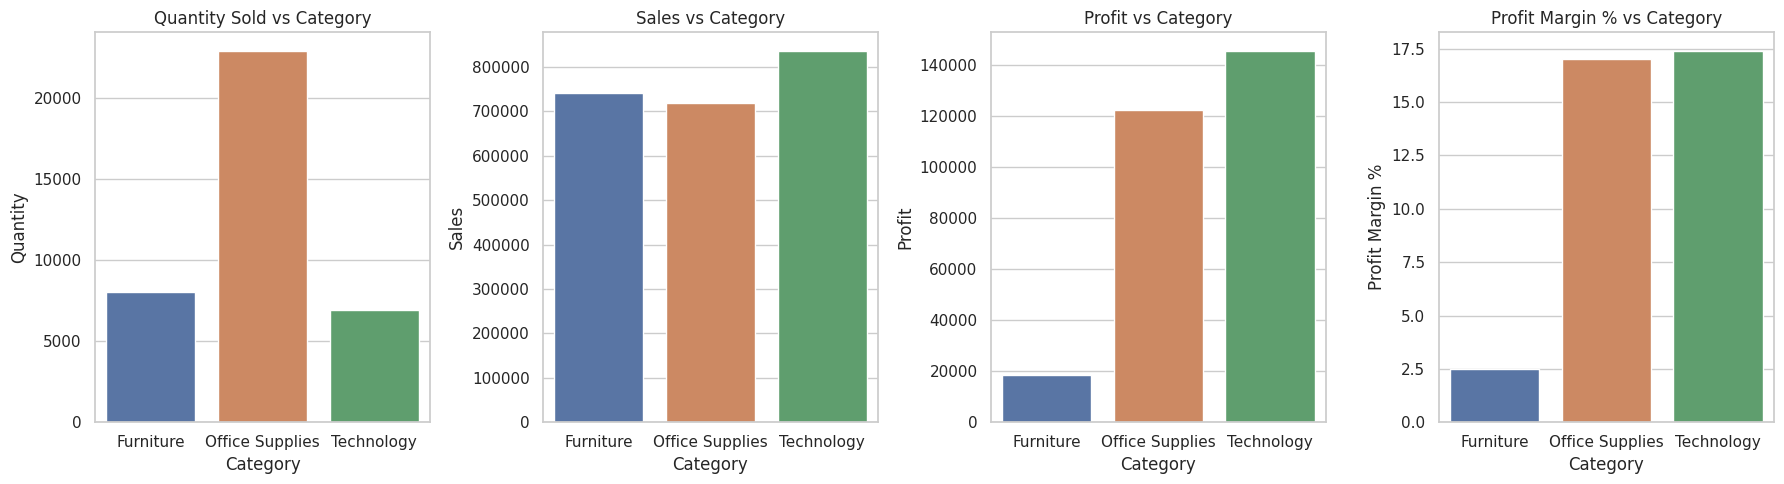

In [12]:
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1,4, figsize = (18,5))


#Plot barplots
cat_1 = sns.barplot(x = category_df.index, y = category_df['Quantity'], ax = axis[0])
cat_2 = sns.barplot(x = category_df.index, y = category_df['Sales'], ax = axis[1])
cat_3 = sns.barplot(x = category_df.index, y = category_df['Profit'], ax = axis[2])
cat_4 = sns.barplot(x = category_df.index, y = category_df['Profit Margin %'], ax = axis[3])


#Set Titles
cat_1.set(title = 'Quantity Sold vs Category')
cat_2.set(title = 'Sales vs Category')
cat_3.set(title = 'Profit vs Category')
cat_4.set(title = 'Profit Margin % vs Category')

#Set spacing between subplots
figure.tight_layout()


Observations:


*   Office Supplies & Technology category have highest Profit Margin %
*   To make more profit store should sell more Technology & Office
    Supplies category products



**2] Sub Category wise Analysis**

In [13]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity', 'Sales', 'Profit']].sum())
sub_category_df

,Quantity,Sales,Profit
Sub-Category,,,
Accessories,2976,167380.3180,41936.6357
Appliances,1729,107532.1610,18138.0054
Art,3000,27118.7920,6527.7870
Binders,5974,203412.7330,30221.7633
Bookcases,868,114879.9963,-3472.5560
Chairs,2356,328449.1030,26590.1663
Copiers,234,149528.0300,55617.8249
Envelopes,906,16476.4020,6964.1767
Fasteners,914,3024.2800,949.5182


In [14]:
#Adding a new column "Profit Margin %" to Category Dataframe
sub_category_df['Profit Margin %'] = (sub_category_df['Profit']/sub_category_df['Sales'])*100

In [15]:
# Sort in descending order according to Total Quantity Sold
sub_category_quantity = pd.DataFrame(sub_category_df.sort_values('Quantity', ascending = False))

# Sort in descending order according to Total Sales
sub_category_sales = pd.DataFrame(sub_category_df.sort_values('Sales', ascending = False))

# Sort in descending order according to Total Profit
sub_category_profit = pd.DataFrame(sub_category_df.sort_values('Profit', ascending = False))

# Sort in descending order according to Total Profit Margin %
sub_category_profit_margin = pd.DataFrame(sub_category_df.sort_values('Profit Margin %', ascending = False))

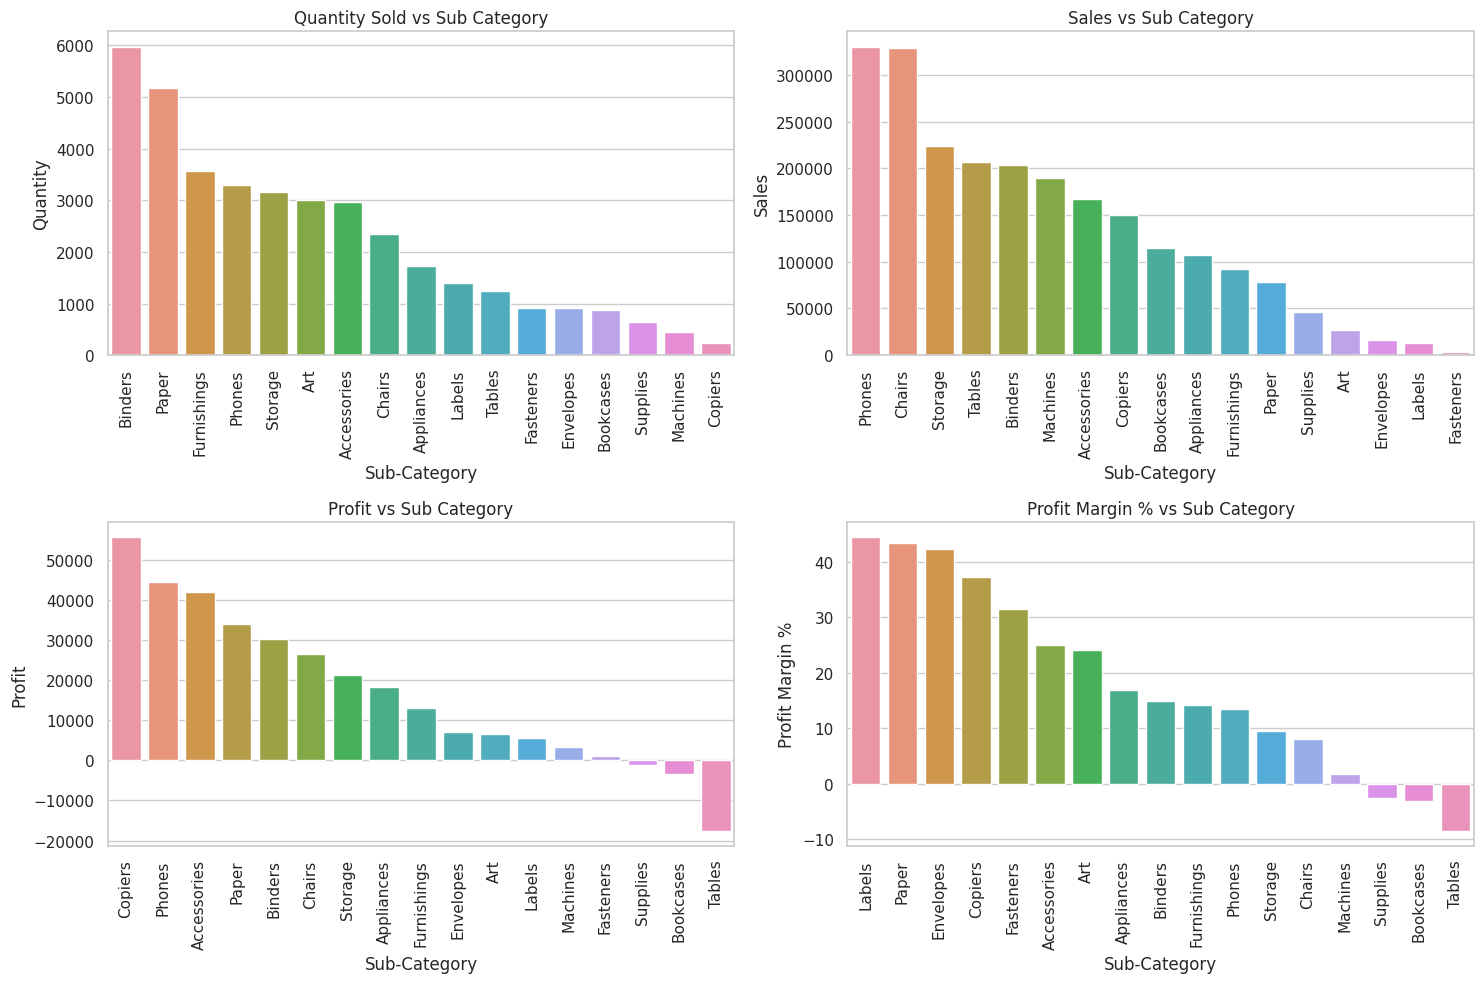

In [16]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(15, 10))

# Plot barplots

# Quantity Sold
sub_cat_1 = sns.barplot(x = sub_category_quantity.index, y = sub_category_quantity['Quantity'], ax=axis[0][0])
sub_cat_1.set_xticklabels(sub_cat_1.get_xticklabels(),rotation = 'vertical')

# Sales
sub_cat_2 = sns.barplot(x = sub_category_sales.index, y = sub_category_sales['Sales'], ax=axis[0][1])
sub_cat_2.set_xticklabels(sub_cat_2.get_xticklabels(),rotation = 'vertical')

# Profit
sub_cat_3 = sns.barplot(x = sub_category_profit.index, y = sub_category_profit['Profit'], ax=axis[1][0])
sub_cat_3.set_xticklabels(sub_cat_3.get_xticklabels(),rotation = 'vertical')

# Profit Margin %
sub_cat_4 = sns.barplot(x = sub_category_profit_margin.index, y = sub_category_profit_margin['Profit Margin %'], ax=axis[1][1])
sub_cat_4.set_xticklabels(sub_cat_4.get_xticklabels(),rotation = 'vertical')

# Set titles
sub_cat_1.set(title = 'Quantity Sold vs Sub Category')
sub_cat_2.set(title = 'Sales vs Sub Category')
sub_cat_3.set(title = 'Profit vs Sub Category')
sub_cat_4.set(title = 'Profit Margin % vs Sub Category')

# Set spacing between subplots
figure.tight_layout()

**Observations:**


*   Store should sell more Copiers, Labels, Paper, Envelopes, Fastners,
    Accessories, Art because of high Profit Margin %
*   Store should stop selling Supplies, Bookcases & Tables



**3] Segment wise Analysis**

In [17]:

segment_df = pd.DataFrame(df.groupby(['Segment'])[['Quantity','Sales','Profit']].sum())
segment_df

,Quantity,Sales,Profit
Segment,,,
Consumer,19521,1.161401e+06,134119.2092
Corporate,11608,7.061464e+05,91979.1340
Home Office,6744,4.296531e+05,60298.6785


In [18]:
# Adding a new column
segment_df['Profit Margin %'] = (segment_df['Profit']/segment_df['Sales'])*100

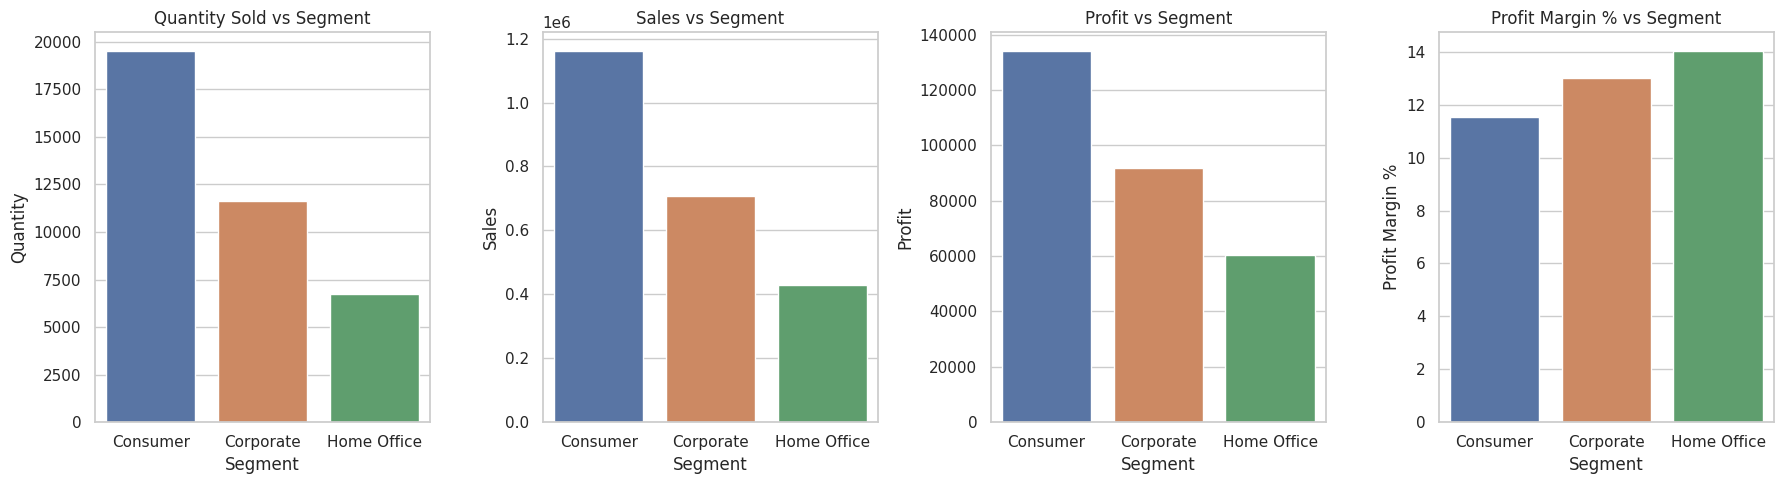

In [19]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 4, figsize=(18, 5))

# Plot barplots
seg_1 = sns.barplot(x = segment_df.index, y = segment_df['Quantity'], ax=axis[0])
seg_2 = sns.barplot(x = segment_df.index, y = segment_df['Sales'], ax=axis[1])
seg_3 = sns.barplot(x = segment_df.index, y = segment_df['Profit'], ax=axis[2])
seg_4 = sns.barplot(x = segment_df.index, y = segment_df['Profit Margin %'], ax=axis[3])

# Set titles
seg_1.set(title = 'Quantity Sold vs Segment')
seg_2.set(title = 'Sales vs Segment')
seg_3.set(title = 'Profit vs Segment')
seg_4.set(title = 'Profit Margin % vs Segment')

# Set spacing between subplots
figure.tight_layout()

**Observations:**


*   Store should sell more to Corporate Segment & Home Office Segment
    becuase of high Profit Margin %
*   But should keep pushing Consumer Segment business also because it has
    highest contibution to our total Profit





**4] Region wise Analysis**

In [20]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Quantity','Sales','Profit']].sum())
region_df

,Quantity,Sales,Profit
Region,,,
Central,8780,501239.8908,39706.3625
East,10618,678781.2400,91522.7800
South,6209,391721.9050,46749.4303
West,12266,725457.8245,108418.4489


In [21]:
# Adding a new column
region_df['Profit Margin %'] = (region_df['Profit']/region_df['Sales'])*100

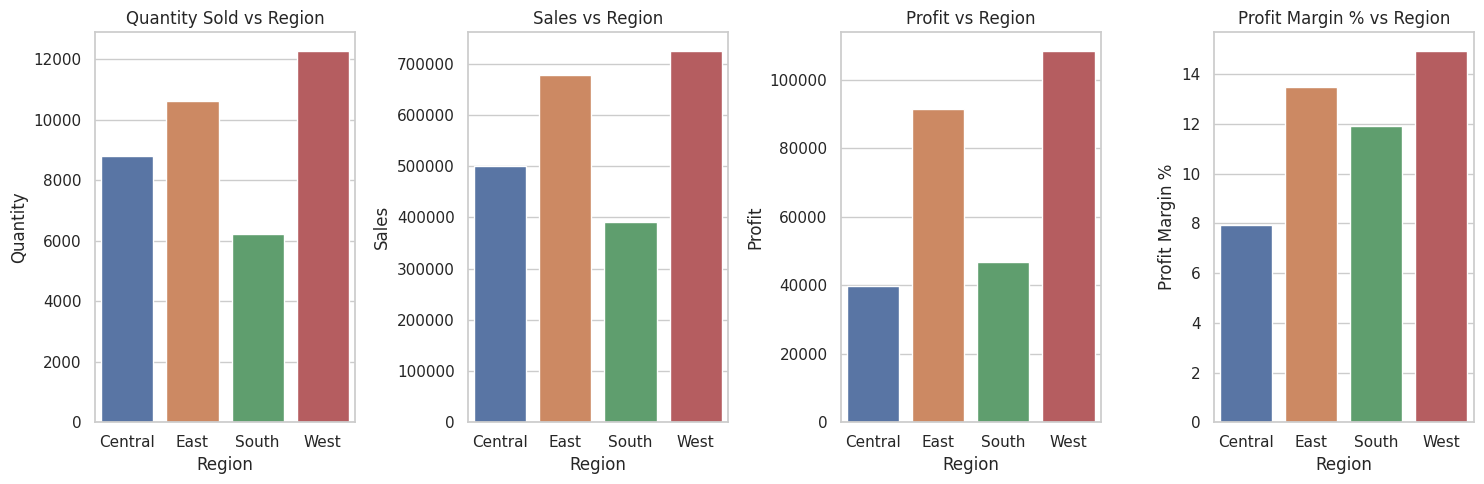

In [22]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 4, figsize=(15, 5))

# Plot barplots
reg_1 = sns.barplot(x = region_df.index, y = region_df['Quantity'], ax=axis[0])
reg_2 = sns.barplot(x = region_df.index, y = region_df['Sales'], ax=axis[1])
reg_3 = sns.barplot(x = region_df.index, y = region_df['Profit'], ax=axis[2])
reg_4 = sns.barplot(x = region_df.index, y = region_df['Profit Margin %'], ax=axis[3])

# Set titles
reg_1.set(title = 'Quantity Sold vs Region')
reg_2.set(title = 'Sales vs Region')
reg_3.set(title = 'Profit vs Region')
reg_4.set(title = 'Profit Margin % vs Region')

# Set spacing between subplots
figure.tight_layout()

**Observation:**

*   West region has highest Profit Margin %
*   Store should sell more products to West, East & South Region



**5] Ship Mode wise Analysis**

In [23]:
ship_mode_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Quantity','Sales','Profit']].sum())
ship_mode_df

,Quantity,Sales,Profit
Ship Mode,,,
First Class,5693,3.514284e+05,48969.8399
Same Day,1960,1.283631e+05,15891.7589
Second Class,7423,4.591936e+05,57446.6354
Standard Class,22797,1.358216e+06,164088.7875


In [24]:
# Adding a new column
ship_mode_df['Profit Margin %'] = (ship_mode_df['Profit']/ship_mode_df['Sales'])*100

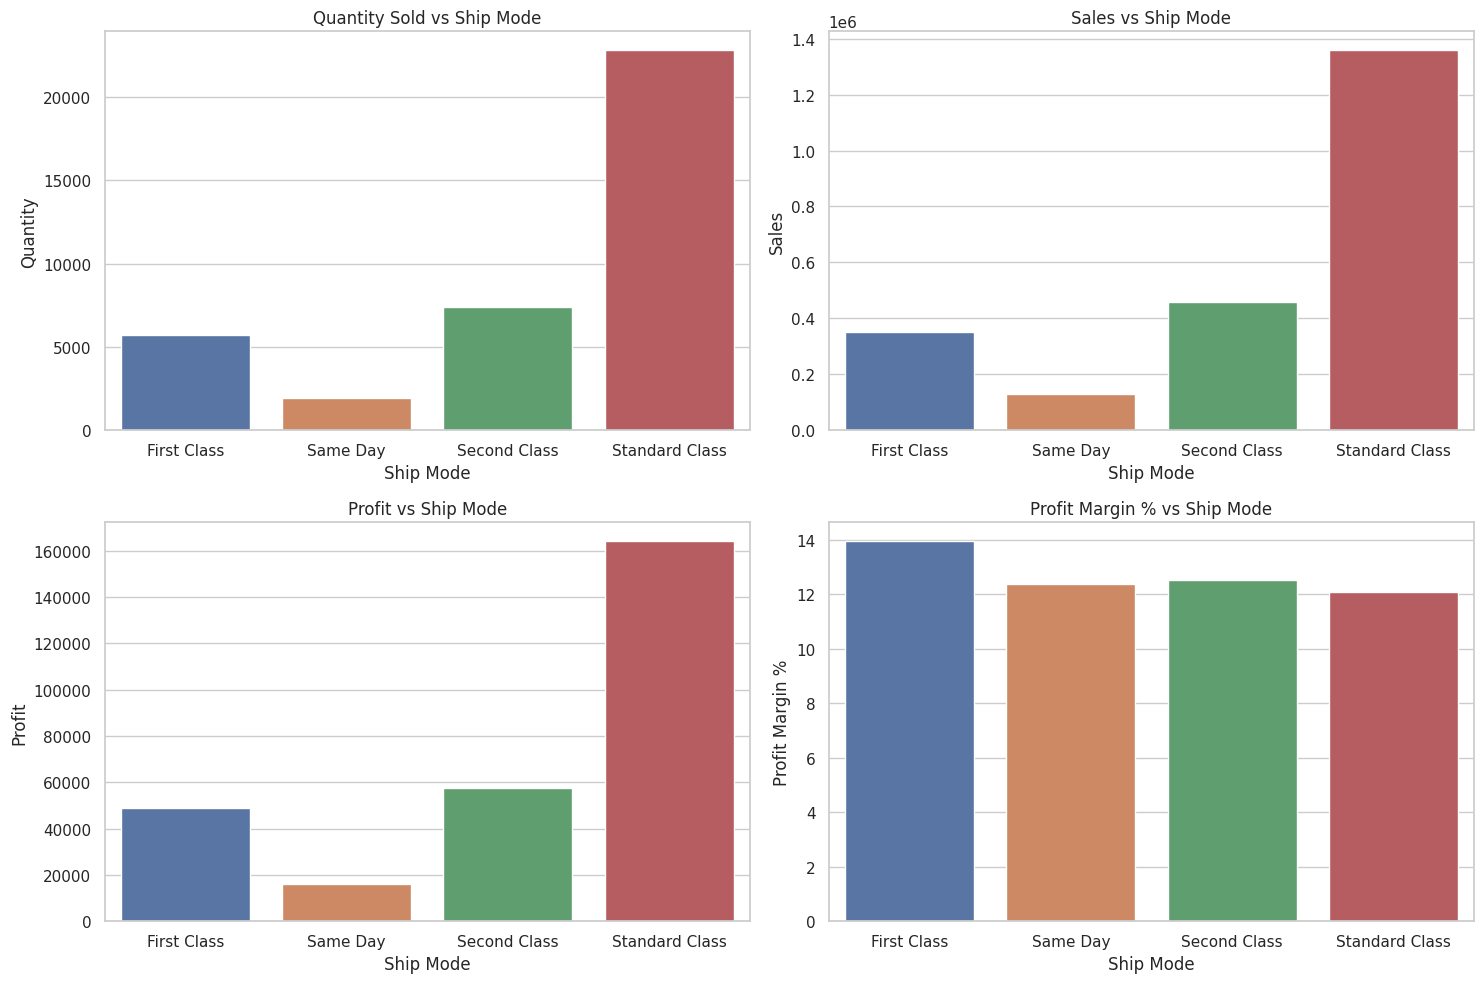

In [25]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(15, 10))

# Plot barplots
sm_1 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df['Quantity'], ax=axis[0][0])
sm_2 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df['Sales'], ax=axis[0][1])
sm_3 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df['Profit'], ax=axis[1][0])
sm_4 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df['Profit Margin %'], ax=axis[1][1])

# Set titles
sm_1.set(title = 'Quantity Sold vs Ship Mode')
sm_2.set(title = 'Sales vs Ship Mode')
sm_3.set(title = 'Profit vs Ship Mode')
sm_4.set(title = 'Profit Margin % vs Ship Mode')

# Set spacing between subplots
figure.tight_layout()


**Observations:**

*   First Class has highest Profit Margin %
*   Standard Class has lowest Profit Margin % but it has highest
    contribution in Total Profit, Total Sales and Total Quantity Sold
*   Store should sell more products through First Class, Same Day & Second
    Class shipping modes





**6] City wise Analysis**

In [26]:
city_df= pd.DataFrame(df.groupby(['City'])[['Quantity', 'Sales', 'Profit']].sum())
city_df

,Quantity,Sales,Profit
City,,,
Aberdeen,3,25.500,6.6300
Abilene,2,1.392,-3.7584
Akron,65,2729.986,-186.6356
Albuquerque,65,2220.160,634.0881
Alexandria,84,5519.570,318.6183
...,...,...,...
Woonsocket,15,195.550,78.6791
Yonkers,57,7657.666,2767.7557
York,19,817.978,-102.1692


In [27]:
# Adding a new column
city_df['Profit Margin %'] = (city_df['Profit']/city_df['Sales'])*100

In [28]:
# Select top 10 and bottom 10 cities by Total Profit
top_10_profit = (city_df.sort_values('Profit',ascending = False)).head(10)
last_10_profit = (city_df.sort_values('Profit',ascending = False)).tail(10)

In [29]:
# Join top 10 and bottom 10 cities by Total Profit
city_top10_last10_profit = top_10_profit.append(last_10_profit)

<ipython-input-29-6f3e8230f8ba>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_top10_last10_profit = top_10_profit.append(last_10_profit)


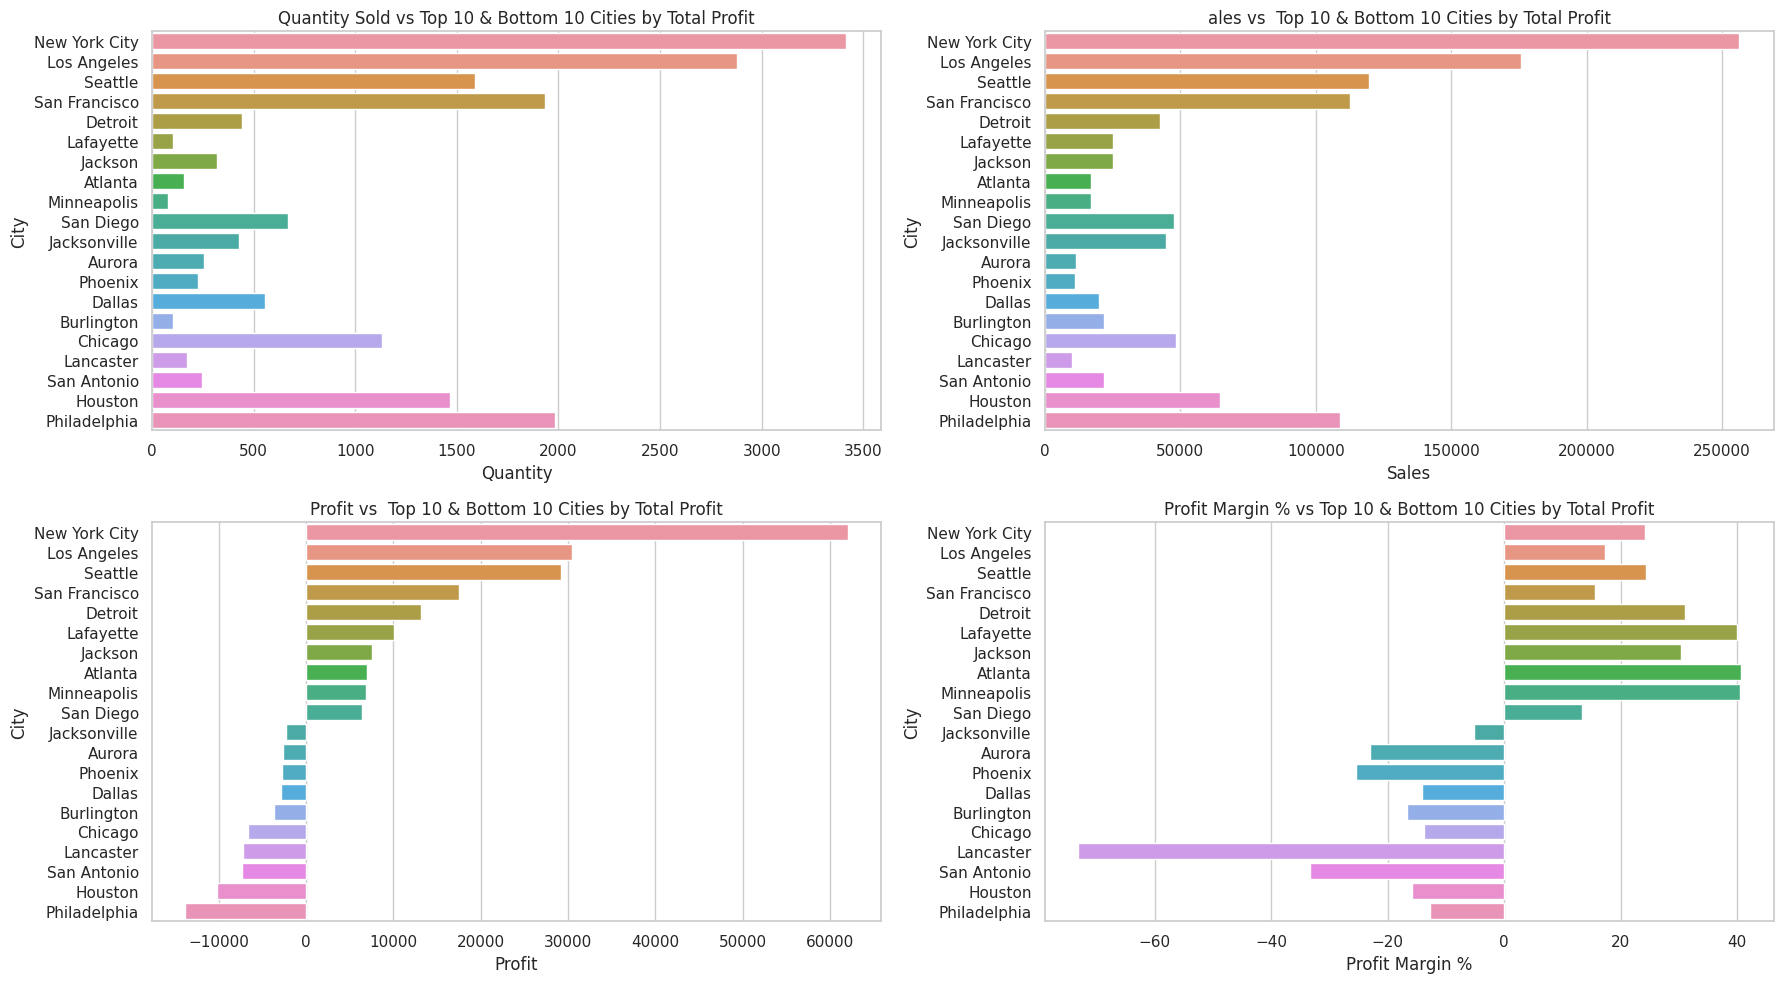

In [30]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(18, 10))

# Plot barplots

# Quantity Sold by top 10 and bottom 10 cities by Total Profit
city_1 = sns.barplot(x = city_top10_last10_profit['Quantity'],y = city_top10_last10_profit.index, ax=axis[0][0])

# Sales by top 10 and bottom 10 cities by Total Profit
city_2 = sns.barplot(x = city_top10_last10_profit['Sales'],y = city_top10_last10_profit.index, ax=axis[0][1])

# Profit earned by top 10 and bottom 10 cities by Total Profit
city_3 = sns.barplot(x = city_top10_last10_profit['Profit'],y = city_top10_last10_profit.index, ax=axis[1][0])

# Profit Margin % for top 10 and bottom 10 cities by Total Profit
city_4 = sns.barplot(x = city_top10_last10_profit['Profit Margin %'],y = city_top10_last10_profit.index, ax=axis[1][1])


# Set titles
city_1.set(title = 'Quantity Sold vs Top 10 & Bottom 10 Cities by Total Profit')
city_2.set(title = 'ales vs  Top 10 & Bottom 10 Cities by Total Profit')
city_3.set(title = 'Profit vs  Top 10 & Bottom 10 Cities by Total Profit')
city_4.set(title = 'Profit Margin % vs Top 10 & Bottom 10 Cities by Total Profit')

# Set spacing between subplots
figure.tight_layout()

**Observations:**


*   New York city has highest Quantity Sold, Sales and Profit but not that
    much Profit Margin %.
*   Store should sell more products to Minneapolis, Atlants, Lafayette,
    Jackson, Seatle, Detroit, San Francisco cities
*   Store should stop business in loss making cities




